cnn_model.py 파일에 함수를 선언하고 호출하는 방식으로 진행

In [1]:
# Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

#!pip install tensorflow

In [ ]:
#!pip install keras


In [ ]:
#! pip install opencv-python

In [1]:
import cnn_model

Using TensorFlow backend.


In [2]:

from tensorflow.python import keras
# import keras

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 입력과 출력 지정하기 --- (*1)
im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간
in_shape = (im_rows, im_cols, im_color)
nb_classes = 6

# 사진 데이터 읽어 들이기 --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 읽어들인 데이터를 3차원 배열로 변환하기 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기 --- (*4)
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 학습 전용과 테스트 전용으로 구분하기 --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNN 모델 만들기 (위에 선언한 함수) --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)

# 학습 실행하기 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# 모델 평가하기 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


Train on 497 samples, validate on 125 samples
Epoch 1/20
497/497 [==============================] - 1s 2ms/step - loss: 1.7886 - accuracy: 0.1932 - val_loss: 1.6703 - val_accuracy: 0.2240
Epoch 2/20
497/497 [==============================] - 1s 1ms/step - loss: 1.5681 - accuracy: 0.3300 - val_loss: 1.5815 - val_accuracy: 0.3760
Epoch 3/20
497/497 [==============================] - 1s 1ms/step - loss: 1.3657 - accuracy: 0.4306 - val_loss: 1.4183 - val_accuracy: 0.4640
Epoch 4/20
497/497 [==============================] - 1s 1ms/step - loss: 1.2338 - accuracy: 0.5111 - val_loss: 1.2371 - val_accuracy: 0.4400
Epoch 5/20
497/497 [==============================] - 1s 1ms/step - loss: 1.1266 - accuracy: 0.5573 - val_loss: 0.9431 - val_accuracy: 0.6960
Epoch 6/20
497/497 [==============================] - 1s 1ms/step - loss: 0.9694 - accuracy: 0.6137 - val_loss: 0.8510 - val_accuracy: 0.6880
Epoch 7/20
497/497 [==============================] - 1s 1ms/step - loss: 0.8935 - accuracy: 0.6660 - 

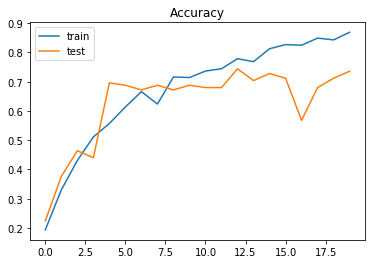

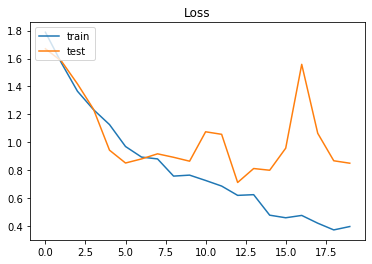

In [3]:

# 학습 상태를 그래프로 그리기 --- (*9)
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')


[ 결과 ] 

정답률이 70% 정도 나온다 하더라도 좋은 결과가 아니다.

만일 값이 너무 안 좋으면 데이타클리닝 작업으로 필요없는 사진을 제거해야 한다.

정답률의 차이는 대부분 데이터의 품질에서 발생한다.